### Linear Regression

In [1]:
import pandas as pd

# here's a reduced version of the datset from Lending Club
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [2]:
loansData['Interest.Rate'][0:5] # first five rows of Interest.Rate

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [3]:
loansData['Loan.Length'][0:5] # first five rows of Loan.Length

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

In [4]:
loansData['FICO.Range'][0:5] # first five rows of FICO.Range

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

In [5]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


In [6]:
# to save time in class - let's use a cleaned up version of the data

loansmin = pd.read_csv('/class/itpmssd/datasets/loanf.csv')

In [7]:
loansmin.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


Populating the interactive namespace from numpy and matplotlib


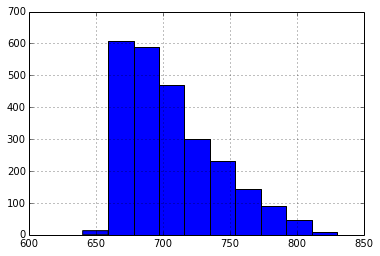

In [8]:
%pylab inline
# Histogram -> distribution of FICO scores in our data

fico = loansmin['FICO.Score']
fico.hist()

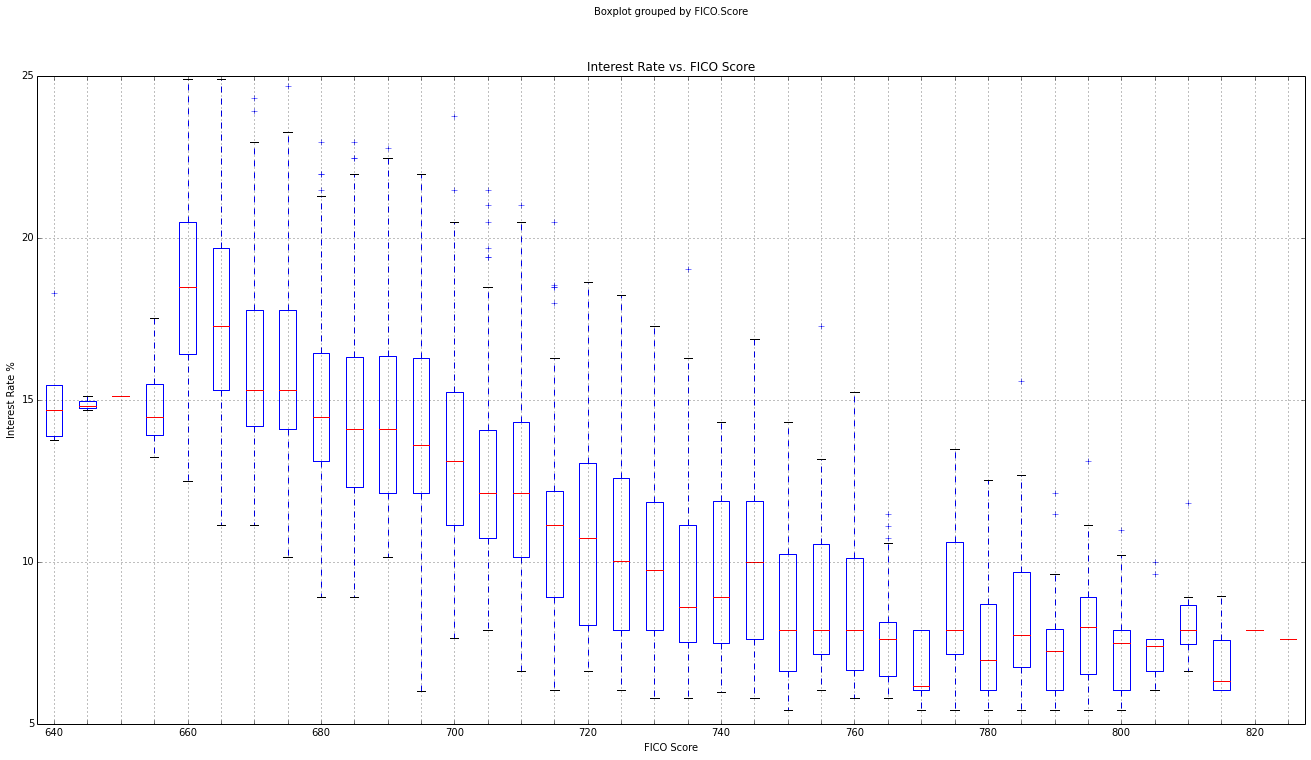

In [9]:
# Box Plot

p = loansmin.boxplot('Interest.Rate','FICO.Score', figsize=(22,12))
p.set_xticklabels(['640','','','','660','','','','680','','','','700','','','',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

xlabel('FICO Score')
ylabel('Interest Rate %')
title('Interest Rate vs. FICO Score')

### Scatterplot Matrix

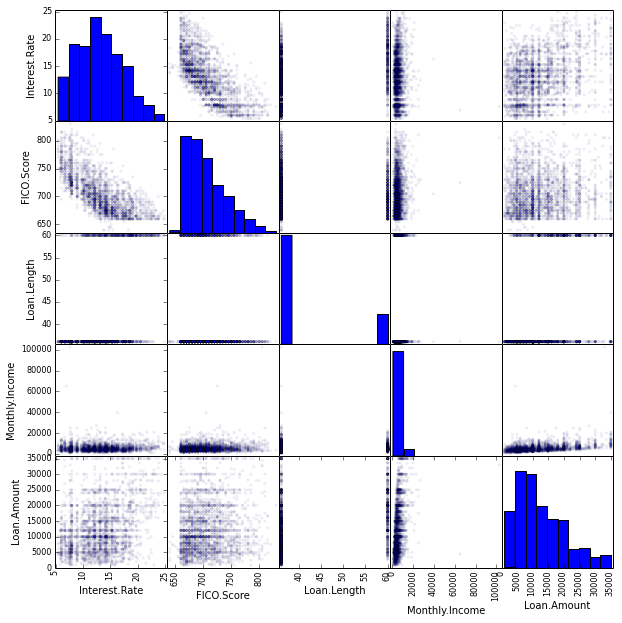

In [10]:
a = pd.scatter_matrix(loansmin,alpha=0.05,figsize=(10,10), diagonal='hist')

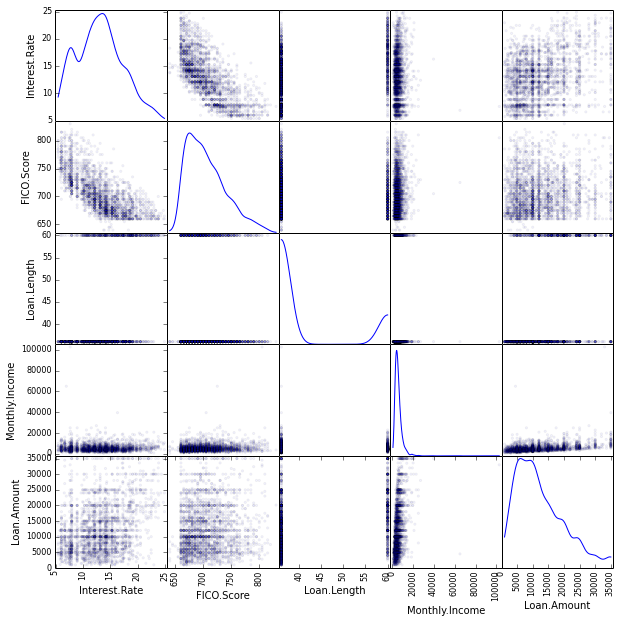

In [11]:
a = pd.scatter_matrix(loansmin,alpha=0.05,figsize=(10,10), diagonal='kde')

#### Analysis

In [12]:
intrate = loansmin['Interest.Rate']
loanamt = loansmin['Loan.Amount']
fico = loansmin['FICO.Score']

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


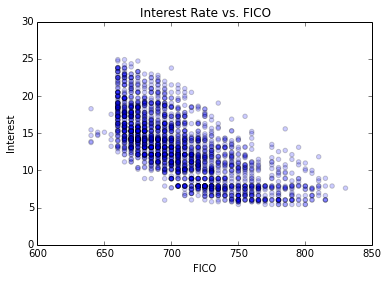

In [14]:
scatter(fico,intrate, alpha=0.2)
title('Interest Rate vs. FICO')
xlabel('FICO')
ylabel('Interest')

In [15]:
# sudo pip install statsmodels, patsy
import statsmodels.api as sm

y = intrate # response
x = fico
X = sm.add_constant(x)
X

,const,FICO.Score
6,1,670
11,1,670
12,1,665
13,1,670
21,1,665
23,1,665
25,1,670
40,1,660
41,1,670
43,1,660


In [16]:
# Ordinary Least Squares

# InterestRate = a0 + a1 * FICO_score

est = sm.OLS(y,X)
f = est.fit()

In [17]:
f.tvalues

const         61.191362
FICO.Score   -50.264574
dtype: float64

In [18]:
f.t_test([1,0])

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0            72.7655      1.189     61.191      0.000        70.434    75.097

In [19]:
f.f_test(np.identity(2))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 25844.61390399]]), p=0.0, df_denom=2498, df_num=2>

In [20]:
print 'Coefficients: ', f.params[0:1]
print 'Intercept: ', f.params[1]
print 'P-Values: ', f.pvalues
print 'R-Squared: ', f.rsquared

Coefficients:  const    72.765472
dtype: float64
Intercept:  -0.0845721651011
P-Values:  const         0
FICO.Score    0
dtype: float64
R-Squared:  0.50283881516


In [ ]:
# can get in-depth OLS Regression Results
#f.summary()
#f.params

In [21]:
# Let's generate the regression line and plot it in Red
import numpy as np

X_prime = np.linspace(X['FICO.Score'].min(), X['FICO.Score'].max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)
X_prime

array([[   1.        ,  640.        ],
       [   1.        ,  641.91919192],
       [   1.        ,  643.83838384],
       [   1.        ,  645.75757576],
       [   1.        ,  647.67676768],
       [   1.        ,  649.5959596 ],
       [   1.        ,  651.51515152],
       [   1.        ,  653.43434343],
       [   1.        ,  655.35353535],
       [   1.        ,  657.27272727],
       [   1.        ,  659.19191919],
       [   1.        ,  661.11111111],
       [   1.        ,  663.03030303],
       [   1.        ,  664.94949495],
       [   1.        ,  666.86868687],
       [   1.        ,  668.78787879],
       [   1.        ,  670.70707071],
       [   1.        ,  672.62626263],
       [   1.        ,  674.54545455],
       [   1.        ,  676.46464646],
       [   1.        ,  678.38383838],
       [   1.        ,  680.3030303 ],
       [   1.        ,  682.22222222],
       [   1.        ,  684.14141414],
       [   1.        ,  686.06060606],
       [   1.        ,  6

In [22]:
# now we calculate the predicted values
y_hat = f.predict(X_prime)
y_hat

array([ 18.63928681,  18.4769766 ,  18.31466638,  18.15235617,
        17.99004595,  17.82773573,  17.66542552,  17.5031153 ,
        17.34080509,  17.17849487,  17.01618466,  16.85387444,
        16.69156422,  16.52925401,  16.36694379,  16.20463358,
        16.04232336,  15.88001314,  15.71770293,  15.55539271,
        15.3930825 ,  15.23077228,  15.06846207,  14.90615185,
        14.74384163,  14.58153142,  14.4192212 ,  14.25691099,
        14.09460077,  13.93229055,  13.76998034,  13.60767012,
        13.44535991,  13.28304969,  13.12073948,  12.95842926,
        12.79611904,  12.63380883,  12.47149861,  12.3091884 ,
        12.14687818,  11.98456796,  11.82225775,  11.65994753,
        11.49763732,  11.3353271 ,  11.17301689,  11.01070667,
        10.84839645,  10.68608624,  10.52377602,  10.36146581,
        10.19915559,  10.03684537,   9.87453516,   9.71222494,
         9.54991473,   9.38760451,   9.22529429,   9.06298408,
         8.90067386,   8.73836365,   8.57605343,   8.41

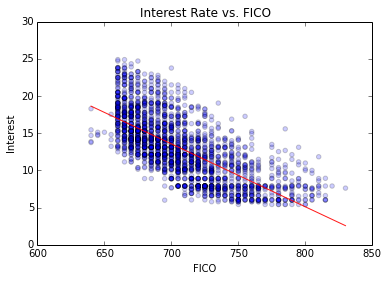

In [23]:
scatter(x, y, alpha=0.2)
plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) # regression line

title('Interest Rate vs. FICO')
xlabel('FICO')
ylabel('Interest')

In [24]:
import numpy as np

# reshape data from pandas Series to columns

y = np.matrix(intrate).transpose() # the dependent variable
x1 = np.matrix(fico).transpose() # independent variable
x2 = np.matrix(loanamt).transpose() # independent variable
x1

matrix([[670],
        [670],
        [665],
        ..., 
        [810],
        [765],
        [740]])

In [25]:
# lets put the two independent variable columns together to create an input matrix
x = np.column_stack([x1,x2])
x

matrix([[  670,  6000],
        [  670,  2000],
        [  665, 10625],
        ..., 
        [  810, 27000],
        [  765, 25000],
        [  740, 16000]])

In [26]:
import statsmodels.api as sm

# create a linear model and fit it to the data
X = sm.add_constant(x)
X

array([[  1.00000000e+00,   6.70000000e+02,   6.00000000e+03],
       [  1.00000000e+00,   6.70000000e+02,   2.00000000e+03],
       [  1.00000000e+00,   6.65000000e+02,   1.06250000e+04],
       ..., 
       [  1.00000000e+00,   8.10000000e+02,   2.70000000e+04],
       [  1.00000000e+00,   7.65000000e+02,   2.50000000e+04],
       [  1.00000000e+00,   7.40000000e+02,   1.60000000e+04]])

In [27]:
# create a linear model and fit it to the data
model = sm.OLS(y,X) # Ordinary Least Squares
f = model.fit()

In [28]:
print 'Coefficients: ', f.params[0:2]
print 'Intercept: ', f.params[2]
print 'P-Values: ', f.pvalues
print 'R-Squared: ', f.rsquared

Coefficients:  [ 72.88279832  -0.08844242]
Intercept:  0.000210747768548
P-Values:  [  0.00000000e+000   0.00000000e+000   5.96972978e-203]
R-Squared:  0.656632624649
